In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('tmdb_5000_credits.csv')
pd.set_option('display.max_columns',999)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [4]:
df.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df['cast']=df['cast'].apply(lambda x:json.loads(x))

In [6]:
df['crew']=df['crew'].apply(lambda x:json.loads(x))

In [7]:
df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'credit_id': '5602a8a7c3a3685532001c9a', 'id...","[{'job': 'Editor', 'department': 'Editing', 'i..."
1,285,Pirates of the Caribbean: At World's End,"[{'credit_id': '52fe4232c3a36847f800b50d', 'id...","[{'job': 'Director of Photography', 'departmen..."
2,206647,Spectre,"[{'credit_id': '52fe4d22c3a368484e1d8d6b', 'id...","[{'job': 'Original Music Composer', 'departmen..."
3,49026,The Dark Knight Rises,"[{'credit_id': '52fe4781c3a36847f8139869', 'id...","[{'job': 'Original Music Composer', 'departmen..."
4,49529,John Carter,"[{'credit_id': '52fe479ac3a36847f813ea75', 'id...","[{'job': 'Screenplay', 'department': 'Writing'..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
df.loc[8,'cast'][5]

{'cast_id': 27,
 'character': 'Horace Slughorn',
 'credit_id': '52fe4273c3a36847f801fafd',
 'gender': 2,
 'id': 388,
 'name': 'Jim Broadbent',
 'order': 5}

In [10]:
df['cast']=df['cast'].apply(lambda x:np.nan if len(x)==0 else x )

In [11]:
df['crew']=df['crew'].apply(lambda x:np.nan if len(x)==0 else x )

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4760 non-null object
crew        4775 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [13]:
df.sample(6)

,movie_id,title,cast,crew
2383,17436,The Informers,"[{'credit_id': '52fe47259251416c7508f41b', 'id...","[{'job': 'Screenplay', 'department': 'Writing'..."
71,1735,The Mummy: Tomb of the Dragon Emperor,"[{'credit_id': '52fe4312c3a36847f80384a3', 'id...","[{'job': 'Casting', 'department': 'Production'..."
977,10386,The Iron Giant,"[{'credit_id': '52fe43649251416c7500e8b7', 'id...","[{'job': 'First Assistant Editor', 'department..."
1975,13476,Win a Date with Tad Hamilton!,"[{'credit_id': '52fe456e9251416c75056465', 'id...","[{'job': 'Director', 'department': 'Directing'..."
54,105864,The Good Dinosaur,"[{'credit_id': '557c3441c3a3686328001d2f', 'id...","[{'job': 'Story', 'department': 'Writing', 'id..."
646,4244,The Kid,"[{'credit_id': '52fe43b5c3a36847f80695f3', 'id...","[{'job': 'Director', 'department': 'Directing'..."


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4760 non-null object
crew        4775 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [15]:
df.dropna(subset=['cast'], axis=0, inplace=True)

In [16]:
df.dropna(subset=['crew'], axis=0, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4753 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4753 non-null int64
title       4753 non-null object
cast        4753 non-null object
crew        4753 non-null object
dtypes: int64(1), object(3)
memory usage: 185.7+ KB


In [18]:
df['crew'].isnull().sum()

0

In [19]:
df.tail(10)

,movie_id,title,cast,crew
4792,36095,Cure,"[{'credit_id': '52fe45cc9251416c9103eb85', 'id...","[{'job': 'Director', 'department': 'Directing'..."
4793,182291,On The Downlow,"[{'credit_id': '52fe4c7f9251416c7511c547', 'id...","[{'job': 'Director', 'department': 'Directing'..."
4794,286939,Sanctuary: Quite a Conundrum,"[{'credit_id': '545f8160c3a3680b5a0008fa', 'id...","[{'job': 'Director', 'department': 'Directing'..."
4795,124606,Bang,"[{'credit_id': '52fe4ab0c3a368484e161ae1', 'id...","[{'job': 'Director', 'department': 'Directing'..."
4796,14337,Primer,"[{'credit_id': '52fe45e79251416c75066787', 'id...","[{'job': 'Director', 'department': 'Directing'..."
4798,9367,El Mariachi,"[{'credit_id': '52fe44eec3a36847f80b27f9', 'id...","[{'job': 'Director', 'department': 'Directing'..."
4799,72766,Newlyweds,"[{'credit_id': '52fe487dc3a368484e0fb001', 'id...","[{'job': 'Director', 'department': 'Directing'..."
4800,231617,"Signed, Sealed, Delivered","[{'credit_id': '52fe4df3c3a36847f8275ed3', 'id...","[{'job': 'Costume Design', 'department': 'Cost..."
4801,126186,Shanghai Calling,"[{'credit_id': '52fe4ad9c3a368484e16a375', 'id...","[{'job': 'Director', 'department': 'Directing'..."
4802,25975,My Date with Drew,"[{'credit_id': '52fe44e8c3a368484e03da91', 'id...","[{'job': 'Executive Producer', 'department': '..."


# Cleaning Second File :movie

In [20]:
movie_df= pd.read_csv('tmdb_5000_movies.csv')

In [21]:
def load_movies(movie_df):
    movie_df['release_date'] = pd.to_datetime(movie_df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        movie_df[column] = movie_df[column].apply(json.loads)
    return movie_df


In [22]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [23]:
load_movies(movie_df)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://www.avatarmovie.com/,19995,"[{'name': 'culture clash', 'id': 1463}, {'name...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'name': 'Adventure', 'id': 12}, {'name': 'Fa...",http://disney.go.com/disneypictures/pirates/,285,"[{'name': 'ocean', 'id': 270}, {'name': 'drug ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://www.sonypictures.com/movies/spectre/,206647,"[{'name': 'spy', 'id': 470}, {'name': 'based o...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'name': 'Action', 'id': 28}, {'name': 'Crime...",http://www.thedarkknightrises.com/,49026,"[{'name': 'dc comics', 'id': 849}, {'name': 'c...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://movies.disney.com/john-carter,49529,"[{'name': 'based on novel', 'id': 818}, {'name...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{'name': 'Fantasy', 'id': 14}, {'name': 'Acti...",http://www.sonypictures.com/movies/spider-man3/,559,"[{'name': 'dual identity', 'id': 851}, {'name'...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-01,890871626,139.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{'name': 'Animation', 'id': 16}, {'name': 'Fa...",http://disney.go.com/disneypictures/tangled/,38757,"[{'name': 'hostage', 'id': 1562}, {'name': 'ma...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-11-24,591794936,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{'name': 'marvel comic', 'id': 8828}, {'name'...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-04-22,1405403694,141

In [24]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [25]:
def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan

In [26]:
def get_director(x):
    directors=[]
    for i in x:
        if i['job'] == 'Director':
            directors.append(i['name'])
    return safe_access(directors, [0])
        

In [27]:
def get_keywords(keywords):
    return ';'.join([x['name'] for x in keywords])

In [28]:
def data_join(movie_df, df):
    movies = movie_df.copy()
    movies['year'] = pd.to_datetime(movies['release_date']).apply(lambda x: x.year)
    movies['country'] = movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    movies['language'] = movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    movies['director'] = df['crew'].apply(get_director)
    movies['actor_1'] = df['cast'].apply(lambda x: safe_access(x, [0, 'name']))
    movies['actor_2'] = df['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    movies['actor_3'] = df['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    movies['companies_1'] = movies['production_companies'].apply(lambda x: safe_access(x, [0, 'name']))
    movies['companies_2'] = movies['production_companies'].apply(lambda x: safe_access(x, [1, 'name']))
    movies['companies_3'] = movies['production_companies'].apply(lambda x: safe_access(x, [2, 'name']))
    movies['genres'] = movies['genres'].apply(get_keywords)
    movies['plot_keywords'] = movie_df['keywords'].apply(get_keywords)
    return movies


In [29]:
movies=data_join(movie_df, df)

In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 31 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [31]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,year,country,language,director,actor_1,actor_2,actor_3,companies_1,companies_2,companies_3,plot_keywords
0,237000000,Action;Adventure;Fantasy;Science Fiction,http://www.avatarmovie.com/,19995,"[{'name': 'culture clash', 'id': 1463}, {'name...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,United States of America,English,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,culture clash;future;space war;space colony;so...
1,300000000,Adventure;Fantasy;Action,http://disney.go.com/disneypictures/pirates/,285,"[{'name': 'ocean', 'id': 270}, {'name': 'drug ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,United States of America,English,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,ocean;drug abuse;exotic island;east india trad...
2,245000000,Action;Adventure;Crime,http://www.sonypictures.com/movies/spectre/,206647,"[{'name': 'spy', 'id': 470}, {'name': 'based o...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0,United Kingdom,Français,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24,spy;based on novel;secret agent;sequel;mi6;bri...
3,250000000,Action;Crime;Drama;Thriller,http://www.thedarkknightrises.com/,49026,"[{'name': 'dc comics', 'id': 849}, {'name': 'c...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0,United States of America,English,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment,dc comics;crime fighter;terrorist;secret ident...
4,260000000,Action;Adventure;Science Fiction,http://movies.disney.com/john-carter,49529,"[{'name': 'based on novel', 'id': 818}, {'name...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0,United States of America,English,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,NaN,NaN,based on novel;mars;medallion;space travel;pri...


### Missing data

In [32]:
def test(x):
    total = x.isnull().sum().sort_values(ascending=False)
    percent = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

### dropping feature generated after release

In [33]:
movies.drop(['popularity','revenue','vote_count'],axis=1, inplace=True)

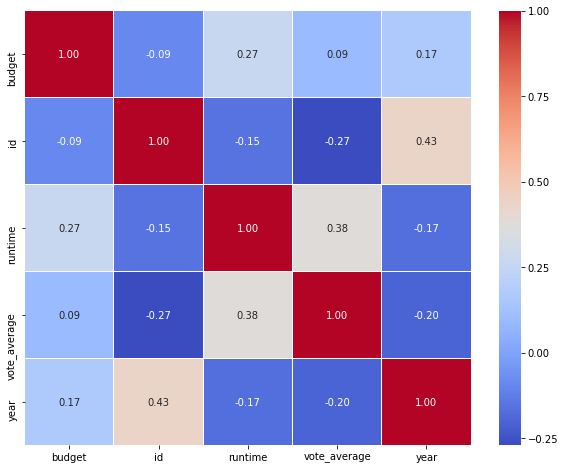

In [34]:
# Correlation matrix between numerical values
plt.figure(figsize = (10,8))
g = sns.heatmap(movies[list(movies)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

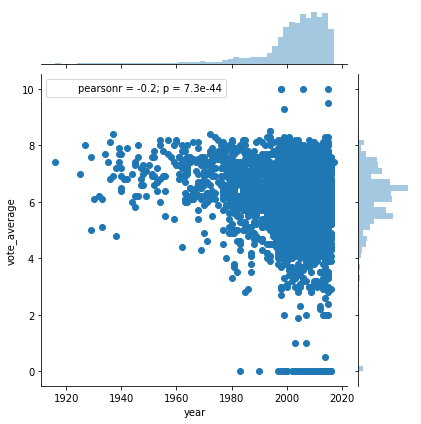

In [35]:
plt.figure(figsize = (10,10))
sns.jointplot(x="year", y=movies['vote_average'], data=movies);

### Dropping missing values

In [36]:
movies['vote_average']=movies['vote_average'].replace(0,np.nan)

In [37]:
movies.dropna(subset=['vote_average'],axis=0,inplace=True)

In [38]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4740 entries, 0 to 4802
Data columns (total 28 columns):
budget                  4740 non-null int64
genres                  4740 non-null object
homepage                1699 non-null object
id                      4740 non-null int64
keywords                4740 non-null object
original_language       4740 non-null object
original_title          4740 non-null object
overview                4738 non-null object
production_companies    4740 non-null object
production_countries    4740 non-null object
release_date            4740 non-null object
runtime                 4739 non-null float64
spoken_languages        4740 non-null object
status                  4740 non-null object
tagline                 3944 non-null object
title                   4740 non-null object
vote_average            4740 non-null float64
year                    4740 non-null float64
country                 4594 non-null object
language                4676 non-null

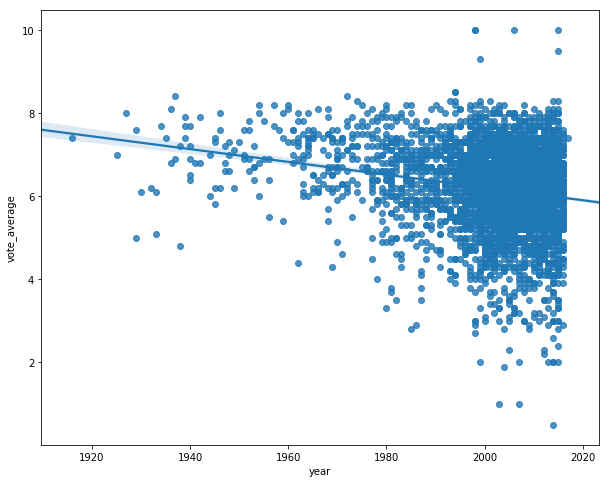

In [39]:
plt.figure(figsize = (10,8))
sns.regplot(x="year", y="vote_average", data=movies)

### Correlation between movie duration and vote average

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

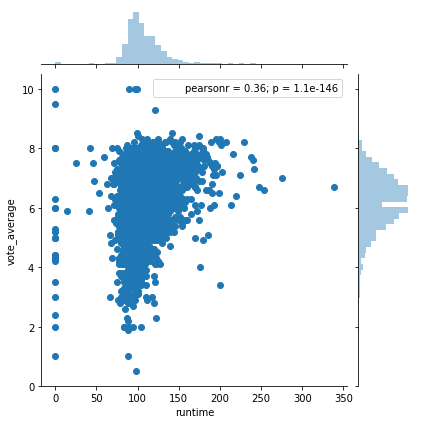

In [40]:
plt.figure(figsize = (10,10))
sns.jointplot(x="runtime", y="vote_average", data=movies)

### Removing data with no runtime value ( 0 )

In [41]:
movies=movies[movies['runtime']!=0]

In [42]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4717 entries, 0 to 4802
Data columns (total 28 columns):
budget                  4717 non-null int64
genres                  4717 non-null object
homepage                1696 non-null object
id                      4717 non-null int64
keywords                4717 non-null object
original_language       4717 non-null object
original_title          4717 non-null object
overview                4715 non-null object
production_companies    4717 non-null object
production_countries    4717 non-null object
release_date            4717 non-null object
runtime                 4716 non-null float64
spoken_languages        4717 non-null object
status                  4717 non-null object
tagline                 3939 non-null object
title                   4717 non-null object
vote_average            4717 non-null float64
year                    4717 non-null float64
country                 4587 non-null object
language                4668 non-null

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 720x720 with 0 Axes>

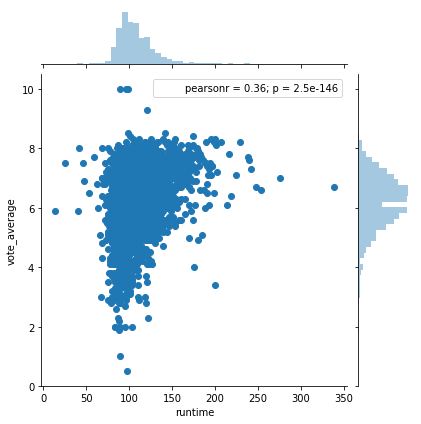

In [43]:
plt.figure(figsize = (10,10))
sns.jointplot(x="runtime", y="vote_average", data=movies)

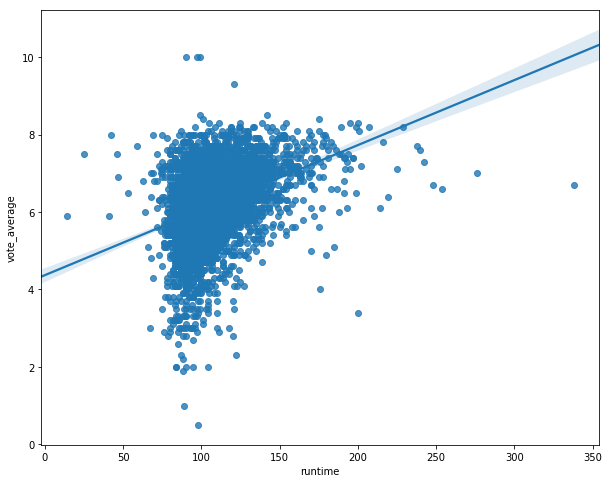

In [44]:
plt.figure(figsize = (10,8))
sns.regplot(x="runtime", y="vote_average", data=movies)

In [45]:
total = movies.isnull().sum().sort_values(ascending=False)
percent = (movies.isnull().sum()/movies.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
homepage,3021,0.640449
companies_3,2394,0.507526
companies_2,1339,0.283867
tagline,778,0.164935
companies_1,293,0.062116
country,130,0.027560
language,49,0.010388
actor_3,40,0.008480
actor_2,32,0.006784
director,26,0.005512


### Feature used for classification: vote_average

In [46]:
movies['vote_average'].min()

0.5

In [47]:
movies['vote_average'].max()

10.0

In [48]:
movies['vote_average'].mean()

6.178418486326055

### Rank=1 -> good movie ( vote_average > mean) , 0 average ( 2< vote_average<mean_vote_average) , -1 bad <2

In [49]:
movies['Rank'] = movies['vote_average'].map(lambda x :1  if x >= movies['vote_average'].mean() else 0)

In [50]:
movies[['vote_average','Rank']][movies['Rank']==1]

,vote_average,Rank
0,7.2,1
1,6.9,1
2,6.3,1
3,7.6,1
6,7.4,1
7,7.3,1
8,7.4,1
12,7.0,1
14,6.5,1
15,6.3,1


In [51]:
movies[['year','title','vote_average','Rank']].head()

,year,title,vote_average,Rank
0,2009.0,Avatar,7.2,1
1,2007.0,Pirates of the Caribbean: At World's End,6.9,1
2,2015.0,Spectre,6.3,1
3,2012.0,The Dark Knight Rises,7.6,1
4,2012.0,John Carter,6.1,0


In [52]:
movies[['year','title','vote_average','Rank']][movies['Rank']==1]

,year,title,vote_average,Rank
0,2009.0,Avatar,7.2,1
1,2007.0,Pirates of the Caribbean: At World's End,6.9,1
2,2015.0,Spectre,6.3,1
3,2012.0,The Dark Knight Rises,7.6,1
6,2010.0,Tangled,7.4,1
7,2015.0,Avengers: Age of Ultron,7.3,1
8,2009.0,Harry Potter and the Half-Blood Prince,7.4,1
12,2006.0,Pirates of the Caribbean: Dead Man's Chest,7.0,1
14,2013.0,Man of Steel,6.5,1
15,2008.0,The Chronicles of Narnia: Prince Caspian,6.3,1


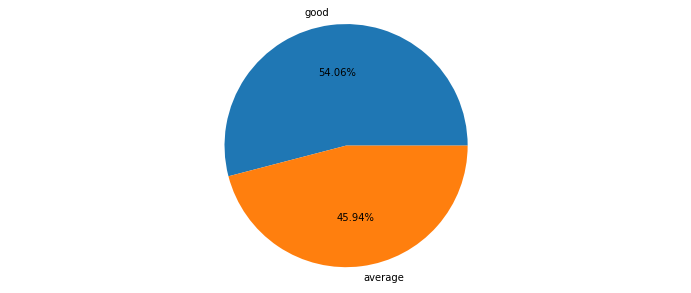

In [53]:
fig, ax = plt.subplots(figsize=(12,5))
plt.pie(movies['Rank'].value_counts(), labels=['good','average'], autopct='%1.2f%%')
plt.axis('equal')
plt.show()

### Budget level (VeryHigh,High,medium,low)

In [54]:
movies['budget'].min()

0

In [55]:
movies=movies[movies['budget']>= 1000000]

In [56]:
movies['budget'].max()

380000000

In [57]:
movies['budget'].mean()

39022421.86761825

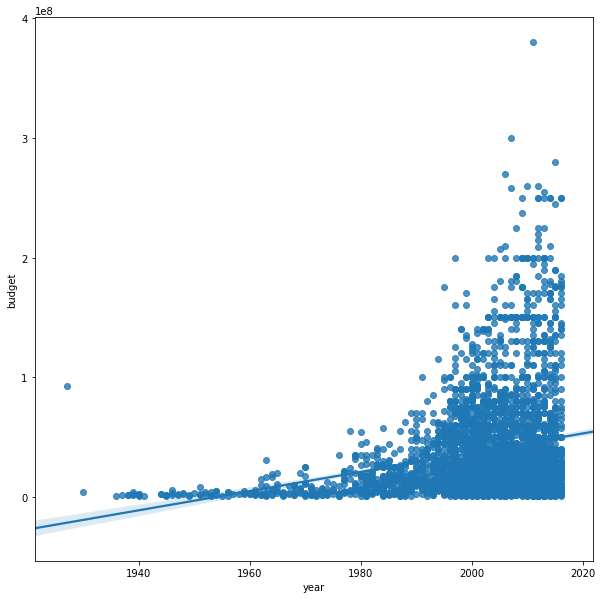

In [58]:
plt.figure(figsize = (10,10))
sns.regplot(x="year", y="budget", data=movies)

In [59]:
def budget_level(x):
    if x >= 100000000:
        return 3
    elif (x < 100000000 and x >= movies['budget'].mean()):
        return 2
    elif (x > 1000000 and x < movies['budget'].mean()):
        return 1
    else:
        return 0

In [60]:
movies['Budget_level'] = movies['budget'].map(budget_level)

In [61]:
movies[['title','budget','Budget_level','Rank']].sample(20)

,title,budget,Budget_level,Rank
1388,This Is 40,35000000,1,0
511,X-Men,75000000,2,1
2341,Catch-22,18000000,1,1
1420,Nanny McPhee and the Big Bang,35000000,1,0
1489,Pushing Tin,33000000,1,0
1640,North Country,35000000,1,1
4108,In the Shadow of the Moon,2000000,1,1
1312,Joe Somebody,38000000,1,0
281,American Gangster,100000000,3,1
4080,Silent House,2000000,1,0


In [62]:
movies[movies['Budget_level']==3][['title','budget','Budget_level','Rank']]

,title,budget,Budget_level,Rank
0,Avatar,237000000,3,1
1,Pirates of the Caribbean: At World's End,300000000,3,1
2,Spectre,245000000,3,1
3,The Dark Knight Rises,250000000,3,1
4,John Carter,260000000,3,0
5,Spider-Man 3,258000000,3,0
6,Tangled,260000000,3,1
7,Avengers: Age of Ultron,280000000,3,1
8,Harry Potter and the Half-Blood Prince,250000000,3,1
9,Batman v Superman: Dawn of Justice,250000000,3,0


### Runtime

In [63]:
movies.dropna(subset=['runtime'],axis=0,inplace=True)

In [64]:
movies['runtime'].mean()

110.11366181410975

In [65]:
movies['runtime'].min()

41.0

In [66]:
movies['runtime'].max()

338.0

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


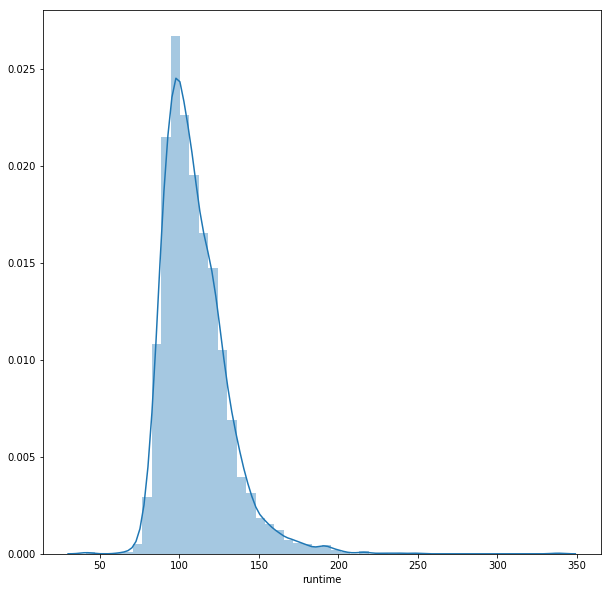

In [67]:
plt.figure(figsize = (10,10))
sns.distplot(movies['runtime'])

In [68]:
def duration(x):
    if x >= 150:
        return 2
    elif (x < 150 and x >= movies['runtime'].mean()):
        return 1
    else:
        return 0

In [69]:
movies['duration']=movies['runtime'].apply(duration)

In [70]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 4758
Data columns (total 31 columns):
budget                  3572 non-null int64
genres                  3572 non-null object
homepage                1409 non-null object
id                      3572 non-null int64
keywords                3572 non-null object
original_language       3572 non-null object
original_title          3572 non-null object
overview                3572 non-null object
production_companies    3572 non-null object
production_countries    3572 non-null object
release_date            3572 non-null object
runtime                 3572 non-null float64
spoken_languages        3572 non-null object
status                  3572 non-null object
tagline                 3229 non-null object
title                   3572 non-null object
vote_average            3572 non-null float64
year                    3572 non-null float64
country                 3550 non-null object
language                3565 non-null

In [71]:
movies.sort_values(by='Budget_level',ascending=False)[['title','budget','Budget_level','Rank','runtime','duration']]

,title,budget,Budget_level,Rank,runtime,duration
0,Avatar,237000000,3,1,162.0,2
204,Fast Five,125000000,3,1,130.0,1
223,The Chronicles of Riddick,105000000,3,1,119.0,1
222,Elysium,115000000,3,1,109.0,0
221,Stuart Little 2,120000000,3,0,78.0,0
220,Prometheus,130000000,3,1,124.0,1
219,Charlie's Angels: Full Throttle,120000000,3,0,106.0,0
218,Jason Bourne,120000000,3,0,123.0,1
217,Ghost Rider,110000000,3,0,114.0,1
216,Life of Pi,120000000,3,1,127.0,1


In [72]:
movies[['title','genres','plot_keywords','director','actor_1','actor_2','actor_3','companies_1','companies_2','companies_3']]

,title,genres,plot_keywords,director,actor_1,actor_2,actor_3,companies_1,companies_2,companies_3
0,Avatar,Action;Adventure;Fantasy;Science Fiction,culture clash;future;space war;space colony;so...,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment
1,Pirates of the Caribbean: At World's End,Adventure;Fantasy;Action,ocean;drug abuse;exotic island;east india trad...,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions
2,Spectre,Action;Adventure;Crime,spy;based on novel;secret agent;sequel;mi6;bri...,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24
3,The Dark Knight Rises,Action;Crime;Drama;Thriller,dc comics;crime fighter;terrorist;secret ident...,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment
4,John Carter,Action;Adventure;Science Fiction,based on novel;mars;medallion;space travel;pri...,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,NaN,NaN
5,Spider-Man 3,Fantasy;Action;Adventure,dual identity;amnesia;sandstorm;love of one's ...,Sam Raimi,Tobey Maguire,Kirsten Dunst,James Franco,Columbia Pictures,Laura Ziskin Productions,Marvel Enterprises
6,Tangled,Animation;Family,hostage;magic;horse;fairy tale;musical;princes...,Byron Howard,Zachary Levi,Mandy Moore,Donna Murphy,Walt Disney Pictures,Walt Disney Animation Studios,NaN
7,Avengers: Age of Ultron,Action;Adventure;Science Fiction,marvel comic;sequel;superhero;based on comic b...,Joss Whedon,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,Marvel Studios,Prime Focus,Revolution Sun Studios
8,Harry Potter and the Half-Blood Prince,Adventure;Fantasy;Family,witch;magic;broom;school of witchcraft;wizardr...,David Yates,Daniel Radcliffe,Rupert Grint,Emma Watson,Warner Bros.,Heyday Films,NaN
9,Batman v Superman: Dawn of Justice,Action;Adventure;Fantasy,dc comics;vigilante;superhero;based on comic b...,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,DC Comics,Atlas Entertainment,Warner Bros.


In [73]:
movies['year']=movies['year'].astype(int)

In [74]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 4758
Data columns (total 31 columns):
budget                  3572 non-null int64
genres                  3572 non-null object
homepage                1409 non-null object
id                      3572 non-null int64
keywords                3572 non-null object
original_language       3572 non-null object
original_title          3572 non-null object
overview                3572 non-null object
production_companies    3572 non-null object
production_countries    3572 non-null object
release_date            3572 non-null object
runtime                 3572 non-null float64
spoken_languages        3572 non-null object
status                  3572 non-null object
tagline                 3229 non-null object
title                   3572 non-null object
vote_average            3572 non-null float64
year                    3572 non-null int64
country                 3550 non-null object
language                3565 non-null o

In [75]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 4758
Data columns (total 31 columns):
budget                  3572 non-null int64
genres                  3572 non-null object
homepage                1409 non-null object
id                      3572 non-null int64
keywords                3572 non-null object
original_language       3572 non-null object
original_title          3572 non-null object
overview                3572 non-null object
production_companies    3572 non-null object
production_countries    3572 non-null object
release_date            3572 non-null object
runtime                 3572 non-null float64
spoken_languages        3572 non-null object
status                  3572 non-null object
tagline                 3229 non-null object
title                   3572 non-null object
vote_average            3572 non-null float64
year                    3572 non-null int64
country                 3550 non-null object
language                3565 non-null o

### Genres

In [76]:
movies['genres'].nunique()

998

In [77]:
def genre(df):
    genres=[]
    for i in df['genres']:
        s=i.split(';')
        for j in s:
            if j not in genres and j!='':
                genres.append(j)
    return genres
        

In [78]:
genres=genre(movies)

In [79]:
len(genres)

20

In [80]:
for col in genres:
    movies[col]=movies['genres'].map(lambda x:1 if col in x.split(';') else 0)

In [81]:
movies[genres]

,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [82]:
movies['plot_keywords'].head()

0    culture clash;future;space war;space colony;so...
1    ocean;drug abuse;exotic island;east india trad...
2    spy;based on novel;secret agent;sequel;mi6;bri...
3    dc comics;crime fighter;terrorist;secret ident...
4    based on novel;mars;medallion;space travel;pri...
Name: plot_keywords, dtype: object

### Dropping certain columns

In [83]:
movies_data=movies.copy()

In [84]:
movies_data.drop(['homepage','id','spoken_languages','overview','original_language','original_title','release_date','runtime','status','tagline','plot_keywords','production_countries','production_companies'],axis=1,inplace=True)

In [85]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 4758
Data columns (total 38 columns):
budget             3572 non-null int64
genres             3572 non-null object
keywords           3572 non-null object
title              3572 non-null object
vote_average       3572 non-null float64
year               3572 non-null int64
country            3550 non-null object
language           3565 non-null object
director           3567 non-null object
actor_1            3568 non-null object
actor_2            3566 non-null object
actor_3            3563 non-null object
companies_1        3514 non-null object
companies_2        2793 non-null object
companies_3        1969 non-null object
Rank               3572 non-null int64
Budget_level       3572 non-null int64
duration           3572 non-null int64
Action             3572 non-null int64
Adventure          3572 non-null int64
Fantasy            3572 non-null int64
Science Fiction    3572 non-null int64
Crime              35

### Dummies 

In [86]:
movies_data=pd.get_dummies(movies_data,columns=['Budget_level','year','duration'],drop_first=True)

In [87]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 4758
Columns: 120 entries, budget to duration_2
dtypes: float64(1), int64(22), object(12), uint8(85)
memory usage: 1.3+ MB


In [88]:
movies_data.shape

(3572, 120)

In [89]:
movies_data.drop(['genres','keywords'],axis=1,inplace=True)

In [90]:
movies_data.head()

,budget,title,vote_average,country,language,director,actor_1,actor_2,actor_3,companies_1,companies_2,companies_3,Rank,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,Budget_level_1,Budget_level_2,Budget_level_3,year_1930,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,duration_1,duration_2
0,237000000,Avatar,7.2,United States of America,English,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,300000000,Pirates of the Caribbean: At World's End,6.9,United States of America,English,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,245000000,Spectre,6.3,United Kingdom,Français,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,250000000,The Dark Knight Rises,7.6,United States of America,English,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,260000000,John Carter,6.1,United States of America,English,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,NaN,NaN,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [91]:
for col in ['actor_1','actor_2','actor_3','companies_1','companies_2','companies_3']:
    movies_data[col].fillna('unknown',inplace=True,axis=0)

In [92]:
movies_data.head()

,budget,title,vote_average,country,language,director,actor_1,actor_2,actor_3,companies_1,companies_2,companies_3,Rank,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,Budget_level_1,Budget_level_2,Budget_level_3,year_1930,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,duration_1,duration_2
0,237000000,Avatar,7.2,United States of America,English,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,300000000,Pirates of the Caribbean: At World's End,6.9,United States of America,English,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,245000000,Spectre,6.3,United Kingdom,Français,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,250000000,The Dark Knight Rises,7.6,United States of America,English,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,260000000,John Carter,6.1,United States of America,English,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,unknown,unknown,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Frequency of appearence of director name

In [93]:
def to_frequency_table(data):
    frequencytable = {}
    for key in data:
        if key in frequencytable:
            frequencytable[key] += 1
        else:
            frequencytable[key] = 1
    return frequencytable

In [94]:
def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=10,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()


In [95]:
director_dic = to_frequency_table(movies_data['director'])
director_list = list(director_dic.items())
director_list.sort(key=lambda tup: tup[1],reverse=True)

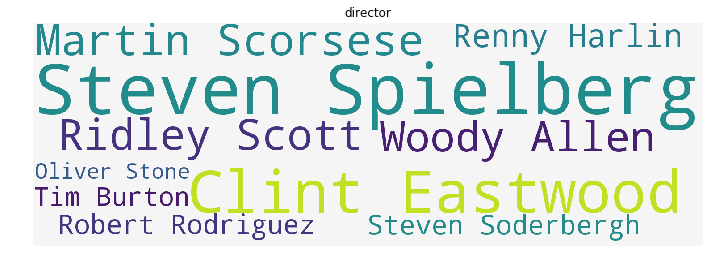

In [96]:
makeCloud(director_list[0:10],"director","whitesmoke")

In [97]:
director_list[0:10][1][0]

'Clint Eastwood'

In [98]:
for key in director_list[0:10]:
    movies_data[key[0]]=movies_data['director'].map(lambda s: 1 if key[0]==s else 0)

In [99]:
movies_data.drop('director',axis=1,inplace=True)

In [100]:
movies_data.head()

,budget,title,vote_average,country,language,actor_1,actor_2,actor_3,companies_1,companies_2,companies_3,Rank,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,Budget_level_1,Budget_level_2,Budget_level_3,year_1930,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,duration_1,duration_2,Steven Spielberg,Clint Eastwood,Ridley Scott,Martin Scorsese,Woody Allen,Steven Soderbergh,Robert Rodriguez,Renny Harlin,Tim Burton,Oliver Stone
0,237000000,Avatar,7.2,United States of America,English,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,300000000,Pirates of the Caribbean: At World's End,6.9,United States of America,English,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,245000000,Spectre,6.3,United Kingdom,Français,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,250000000,The Dark Knight Rises,7.6,United States of America,English,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,260000000,John Carter,6.1,United States of America,English,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,unknown,unknown,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Actors

In [101]:
actor_dic = to_frequency_table(movies_data['actor_1'])
actor_list = list(actor_dic.items())
actor_list.sort(key=lambda tup: tup[1],reverse=True)

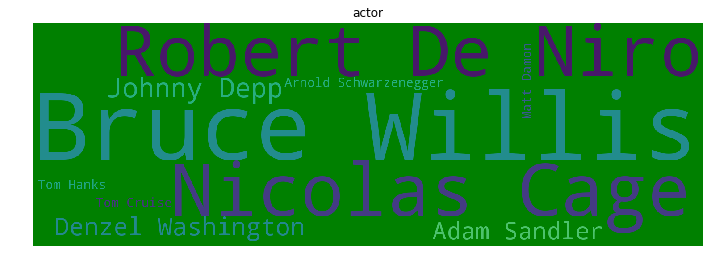

In [102]:
makeCloud(actor_list[0:10],"actor","green")

In [103]:
for key in actor_list[0:10]:
    movies_data[key[0]]=movies_data['actor_1'].map(lambda s: 1 if key[0]==s[0] else 0)

In [104]:
movies_data.drop('actor_1',axis=1,inplace=True)

In [105]:
movies_data.head()

,budget,title,vote_average,country,language,actor_2,actor_3,companies_1,companies_2,companies_3,Rank,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,Budget_level_1,Budget_level_2,Budget_level_3,year_1930,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,duration_1,duration_2,Steven Spielberg,Clint Eastwood,Ridley Scott,Martin Scorsese,Woody Allen,Steven Soderbergh,Robert Rodriguez,Renny Harlin,Tim Burton,Oliver Stone,Bruce Willis,Robert De Niro,Nicolas Cage,Johnny Depp,Denzel Washington,Matt Damon,Adam Sandler,Tom Hanks,Tom Cruise,Arnold Schwarzenegger
0,237000000,Avatar,7.2,United States of America,English,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,300000000,Pirates of the Caribbean: At World's End,6.9,United States of America,English,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,245000000,Spectre,6.3,United Kingdom,Français,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,250000000,The Dark Knight Rises,7.6,United States of America,English,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,260000000,John Carter,6.1,United States of America,English,Lynn Collins,Samantha Morton,Walt Disney Pictures,unknown,unknown,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Company

In [106]:
company_dic = to_frequency_table(movies_data['companies_1'])
company_list = list(company_dic.items())
company_list.sort(key=lambda tup: tup[1],reverse=True)

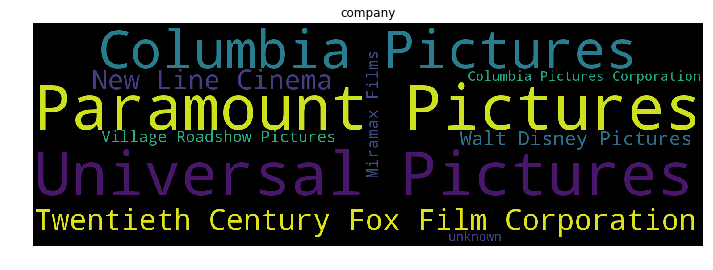

In [107]:
makeCloud(company_list[0:10],"company","black")

In [108]:
for key in company_list[0:10]:
    movies_data[key[0]]=movies_data['companies_1'].map(lambda s: 1 if key[0]==s[0] else 0)

movies_data.drop('companies_1',axis=1,inplace=True)
movies_data.head()

,budget,title,vote_average,country,language,actor_2,actor_3,companies_2,companies_3,Rank,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,Budget_level_1,Budget_level_2,Budget_level_3,year_1930,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,duration_1,duration_2,Steven Spielberg,Clint Eastwood,Ridley Scott,Martin Scorsese,Woody Allen,Steven Soderbergh,Robert Rodriguez,Renny Harlin,Tim Burton,Oliver Stone,Bruce Willis,Robert De Niro,Nicolas Cage,Johnny Depp,Denzel Washington,Matt Damon,Adam Sandler,Tom Hanks,Tom Cruise,Arnold Schwarzenegger,Paramount Pictures,Universal Pictures,Columbia Pictures,Twentieth Century Fox Film Corporation,New Line Cinema,Walt Disney Pictures,Miramax Films,Village Roadshow Pictures,Columbia Pictures Corporation,unknown
0,237000000,Avatar,7.2,United States of America,English,Zoe Saldana,Sigourney Weaver,Twentieth Century Fox Film Corporation,Dune Entertainment,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,300000000,Pirates of the Caribbean: At World's End,6.9,United States of America,English,Orlando Bloom,Keira Knightley,Jerry Bruckheimer Films,Second Mate Productions,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,245000000,Spectre,6.3,United Kingdom,Français,Christoph Waltz,Léa Seydoux,Danjaq,B24,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,250000000,The Dark Knight Rises,7.6,United States of America,English,Michael Caine,Gary Oldman,Warner Bros.,DC Entertainment,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,260000000,John Carter,6.1,United States of America,English,Lynn Collins,Samantha Morton,unknown,unknown,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Final check for missing data

In [109]:
test(movies_data)

,Total,Percent
country,22,0.006159
language,7,0.001960
unknown,0,0.000000
year_1949,0,0.000000
year_1955,0,0.000000
year_1954,0,0.000000
year_1953,0,0.000000
year_1952,0,0.000000
year_1951,0,0.000000
year_1950,0,0.000000


### Dropping columns

In [110]:
movies_data.columns.values

array(['budget', 'title', 'vote_average', 'country', 'language',
       'actor_2', 'actor_3', 'companies_2', 'companies_3', 'Rank',
       'Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', 'TV Movie', 'Budget_level_1',
       'Budget_level_2', 'Budget_level_3', 'year_1930', 'year_1936',
       'year_1937', 'year_1938', 'year_1939', 'year_1940', 'year_1941',
       'year_1944', 'year_1945', 'year_1946', 'year_1947', 'year_1948',
       'year_1949', 'year_1950', 'year_1951', 'year_1952', 'year_1953',
       'year_1954', 'year_1955', 'year_1956', 'year_1957', 'year_1958',
       'year_1959', 'year_1960', 'year_1961', 'year_1962', 'year_1963',
       'year_1964', 'year_1965', 'year_1966', 'year_1967', 'year_1968',
       'year_1969', 'year_1970', 'year_1971', 'year_1972', 'year_1973',
       'year_1974', 'year

In [167]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3572 entries, 0 to 4758
Columns: 136 entries, Rank to unknown
dtypes: int64(51), uint8(85)
memory usage: 1.7 MB


In [111]:
movies_data.drop(['budget', 'title', 'vote_average', 'country', 'language','actor_2', 'actor_3', 'companies_2', 'companies_3'],inplace=True,axis=1)

In [112]:
movies_data.head()

,Rank,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,Thriller,Animation,Family,Western,Comedy,Romance,Horror,Mystery,History,War,Music,Documentary,Foreign,TV Movie,Budget_level_1,Budget_level_2,Budget_level_3,year_1930,year_1936,year_1937,year_1938,year_1939,year_1940,year_1941,year_1944,year_1945,year_1946,year_1947,year_1948,year_1949,year_1950,year_1951,year_1952,year_1953,year_1954,year_1955,year_1956,year_1957,year_1958,year_1959,year_1960,year_1961,year_1962,year_1963,year_1964,year_1965,year_1966,year_1967,year_1968,year_1969,year_1970,year_1971,year_1972,year_1973,year_1974,year_1975,year_1976,year_1977,year_1978,year_1979,year_1980,year_1981,year_1982,year_1983,year_1984,year_1985,year_1986,year_1987,year_1988,year_1989,year_1990,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,duration_1,duration_2,Steven Spielberg,Clint Eastwood,Ridley Scott,Martin Scorsese,Woody Allen,Steven Soderbergh,Robert Rodriguez,Renny Harlin,Tim Burton,Oliver Stone,Bruce Willis,Robert De Niro,Nicolas Cage,Johnny Depp,Denzel Washington,Matt Damon,Adam Sandler,Tom Hanks,Tom Cruise,Arnold Schwarzenegger,Paramount Pictures,Universal Pictures,Columbia Pictures,Twentieth Century Fox Film Corporation,New Line Cinema,Walt Disney Pictures,Miramax Films,Village Roadshow Pictures,Columbia Pictures Corporation,unknown
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
test(movies_data)

,Total,Percent
unknown,0,0.0
year_1955,0,0.0
year_1961,0,0.0
year_1960,0,0.0
year_1959,0,0.0
year_1958,0,0.0
year_1957,0,0.0
year_1956,0,0.0
year_1954,0,0.0
Columbia Pictures Corporation,0,0.0


### Splitting data into train and test

In [114]:
predictors=[col for col in movies_data.columns.values if col!='Rank']
X=movies_data[predictors].values
Y=movies_data['Rank'].values


In [115]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=26)

# KNN model

In [174]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_grid={'n_neighbors':[i for i in range(9,20)]}
grid=GridSearchCV(KNeighborsClassifier(), k_grid, verbose=3)
knn_f=grid.fit(X_train, y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] n_neighbors=9 ...................................................
[CV] ........... n_neighbors=9, score=0.657074340527578, total=   0.4s
[CV] n_neighbors=9 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .......... n_neighbors=9, score=0.6654676258992805, total=   0.4s
[CV] n_neighbors=9 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV] .......... n_neighbors=9, score=0.6478365384615384, total=   0.4s
[CV] n_neighbors=10 ..................................................
[CV] ......... n_neighbors=10, score=0.6354916067146283, total=   0.4s
[CV] n_neighbors=10 ..................................................
[CV] ......... n_neighbors=10, score=0.6690647482014388, total=   0.4s
[CV] n_neighbors=10 ..................................................
[CV] ......... n_neighbors=10, score=0.6394230769230769, total=   0.3s
[CV] n_neighbors=11 ..................................................
[CV] .......... n_neighbors=11, score=0.645083932853717, total=   0.3s
[CV] n_neighbors=11 ..................................................
[CV] ......... n_neighbors=11, score=0.6858513189448441, total=   0.3s
[CV] n_neighbors=11 ..................................................
[CV] ......... n_neighbors=11, score=0.6574519230769231, total=   0.4s
[CV] n_neighbors=12 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   33.3s finished


In [117]:
grid.best_score_, grid.best_params_

(0.6696, {'n_neighbors': 17})

### Cross-validation

In [118]:
c_knn = cross_val_score(knn, X_train, y_train, cv=10)
c_knn.mean()

0.6320200451207219

### Test score

In [119]:
grid.score(X=X_test,y=y_test)

0.7014925373134329

In [120]:
predictions_val=grid.predict(X_test)

In [121]:
confusion_matrix(y_test, grid.predict(X_test))

array([[334, 150],
       [170, 418]])

In [122]:
print(classification_report(y_test, predictions_val))

             precision    recall  f1-score   support

          0       0.66      0.69      0.68       484
          1       0.74      0.71      0.72       588

avg / total       0.70      0.70      0.70      1072



In [123]:
predictions=grid.predict_proba(X_test)

In [124]:
def get_predictions(predictions):
    knn_result = pd.DataFrame(predictions)
    knn_result['Predict'] = knn_result[0].map(lambda s: 1 if s >= 0.6  else 0)
    knn_result['testAnswer'] = pd.DataFrame(y_test)

    knn_result['Correct'] = np.where((knn_result['Predict'] == knn_result['testAnswer'])
                         , 1, 0)
    return knn_result

In [125]:
knn_result=get_predictions(predictions).head()

In [126]:
y_pred=grid.predict(X_test)

In [127]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[334 150]
 [170 418]]
             precision    recall  f1-score   support

          0       0.66      0.69      0.68       484
          1       0.74      0.71      0.72       588

avg / total       0.70      0.70      0.70      1072



# Naive Bayes

In [128]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB(priors=None)

In [129]:
gnb.score(X_train, y_train)

0.4944

### Cross-validation 

In [130]:
cv_gnb =  cross_val_score(gnb, X_train, y_train, cv=10)
cv_gnb.mean()

0.47999029744475913

In [131]:
gnb_predictions=gnb.predict_proba(X_test)

### Test score

In [132]:
gnb.score(X=X_test,y=y_test)

0.48880597014925375

In [133]:
gnb_result=get_predictions(gnb_predictions).head()

In [134]:
get_predictions(gnb_predictions)['Correct'].mean()

0.5111940298507462

In [169]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred=gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[468  16]
 [532  56]]
             precision    recall  f1-score   support

          0       0.47      0.97      0.63       484
          1       0.78      0.10      0.17       588

avg / total       0.64      0.49      0.38      1072



# Decision Tree algorithm

In [135]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
dt.score(X_train, y_train)

0.9372

### Cross-validation

In [137]:
cv_dt =  cross_val_score(dt, X_train, y_train, cv=10)
cv_dt.mean()

0.6127783036528585

### Test score

In [138]:
dt.score(X=X_test,y=y_test)

0.6539179104477612

In [139]:
dt_predictions=dt.predict_proba(X_test)

In [140]:
dt_result=get_predictions(dt_predictions).head()

In [141]:
get_predictions(dt_predictions)['Correct'].mean()

0.35634328358208955

In [170]:
y_pred=dt.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[309 175]
 [196 392]]
             precision    recall  f1-score   support

          0       0.61      0.64      0.62       484
          1       0.69      0.67      0.68       588

avg / total       0.66      0.65      0.65      1072



# Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [143]:
rf.score(X_train, y_train)

0.926

### Cross-validation

In [144]:
cv_rf =  cross_val_score(rf, X_train, y_train, cv=10)
cv_rf.mean()

0.6447865149842398

### Test score

In [145]:
rf.score(X=X_test,y=y_test)

0.6735074626865671

In [146]:
predictions=dt.predict(X_test)

In [147]:
print(classification_report(y_true=y_test,y_pred=predictions))

             precision    recall  f1-score   support

          0       0.61      0.64      0.62       484
          1       0.69      0.67      0.68       588

avg / total       0.66      0.65      0.65      1072



In [148]:
rf_predictions=rf.predict_proba(X_test)

rf_result=get_predictions(rf_predictions).head()

get_predictions(rf_predictions)['Correct'].mean()

0.32276119402985076

In [171]:
y_pred=rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[321 163]
 [187 401]]
             precision    recall  f1-score   support

          0       0.63      0.66      0.65       484
          1       0.71      0.68      0.70       588

avg / total       0.68      0.67      0.67      1072



# XGBOOST

In [150]:
import xgboost as xgb

xgbm = xgb.XGBClassifier()
xgbm.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [151]:
xgbm.score(X_train, y_train)

/home/najet/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7208

### Cross-validation

In [152]:
cv_xgbm =  cross_val_score(xgbm, X_train, y_train, cv=10)
cv_xgbm.mean()

/home/najet/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/najet/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/najet/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/najet/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Return

0.6872459783356534

### Test score

In [153]:
xgbm.score(X=X_test,y=y_test)

/home/najet/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7164179104477612

In [154]:
predictions=xgbm.predict(X_test)

/home/najet/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [172]:
y_pred=xgbm.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[311 173]
 [131 457]]
             precision    recall  f1-score   support

          0       0.70      0.64      0.67       484
          1       0.73      0.78      0.75       588

avg / total       0.72      0.72      0.71      1072



/home/najet/.local/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [165]:
xgbm_predictions=xgbm.predict_proba(X_test)

xgbm_result=get_predictions(xgbm_predictions).head()

get_predictions(xgbm_predictions)['Correct'].mean()

0.28824626865671643

# Model performance

In [180]:
cv_means = []
cv_means.append(cv_dt.mean())
cv_means.append(c_knn.mean())
cv_means.append(cv_rf.mean())
cv_means.append(cv_gnb.mean())
cv_means.append(cv_xgbm.mean())


In [181]:
cv_std = []
cv_std.append(cv_dt.std())
cv_std.append(c_knn.std())
cv_std.append(cv_rf.std())
cv_std.append(cv_gnb.std())
cv_std.append(cv_xgbm.std())

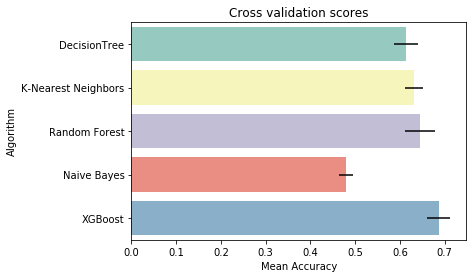

In [183]:
res1 = pd.DataFrame({"ACC":cv_means,"Std":cv_std,"Algorithm":["DecisionTree","K-Nearest Neighbors","Random Forest","Naive Bayes","XGBoost"]})
res1["Type"]= "CrossValid"
g = sns.barplot("ACC","Algorithm",data = res1, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


### Model Test

In [185]:
tv_means = []
tv_means.append(dt_result['Correct'].mean())
tv_means.append(gnb_result['Correct'].mean())
tv_means.append(knn_result['Correct'].mean())
tv_means.append(rf_result['Correct'].mean())
tv_means.append(xgbm_result['Correct'].mean())


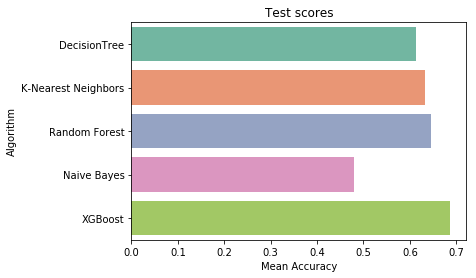

In [186]:
res2 = pd.DataFrame({"ACC":cv_means,"Std":cv_std,"Algorithm":["DecisionTree","K-Nearest Neighbors","Random Forest","Naive Bayes","XGBoost"]})
res2['Type'] = "Test";

g = sns.barplot("ACC","Algorithm",data = res2, palette="Set2",orient = "h")
g.set_xlabel("Mean Accuracy")
g = g.set_title("Test scores")

In [187]:
res = pd.concat([res1,res2])

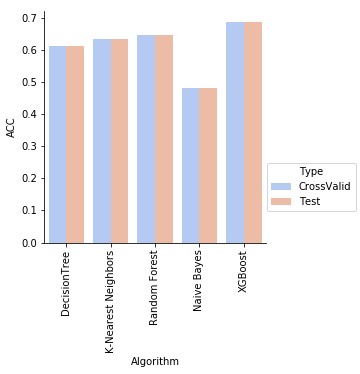

In [188]:
g = sns.factorplot(x='Algorithm', y='ACC', hue='Type',palette="coolwarm", data=res, kind='bar')
g.set_xticklabels(rotation=90)


### Feauture importance

Text(0,0.5,'Feature Importance Score')

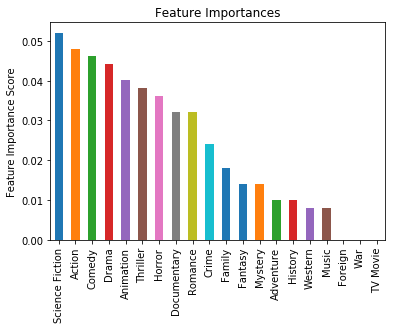

In [179]:
knn.fit(X_train, y_train)
feat_imp = pd.Series(xgbm.feature_importances_[:20], index=predictors[:20]).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')